In [4]:
import os
os.chdir('../')
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import matplotlib.image as mpimg
import numpy as np
from sklearn.metrics import confusion_matrix
%matplotlib inline
matplotlib.rcParams.update({'font.size': 22})

In [5]:
csv='multimodal_net/datasets/letsdance_splits/all_videos_complete.csv'


In [6]:
df = pd.read_csv(csv, sep='\t', names=['target', 'filename', 'duration'])


In [7]:
df.head()

,target,filename,duration
0,foxtrot,02WOiWd3Z-0_052,301
1,samba,Clez1pjv50Y_106,251
2,samba,OmsD5qv6uPE_039,251
3,waltz,mWEhW3gomw8_029,300
4,flamenco,ijRrDHeAcTg_021,300


In [8]:
df.describe().to_latex()

'\\begin{tabular}{lr}\n\\toprule\n{} &     duration \\\\\n\\midrule\ncount &  1384.000000 \\\\\nmean  &   279.966040 \\\\\nstd   &    40.255254 \\\\\nmin   &    51.000000 \\\\\n25\\%   &   251.000000 \\\\\n50\\%   &   300.000000 \\\\\n75\\%   &   300.000000 \\\\\nmax   &   602.000000 \\\\\n\\bottomrule\n\\end{tabular}\n'

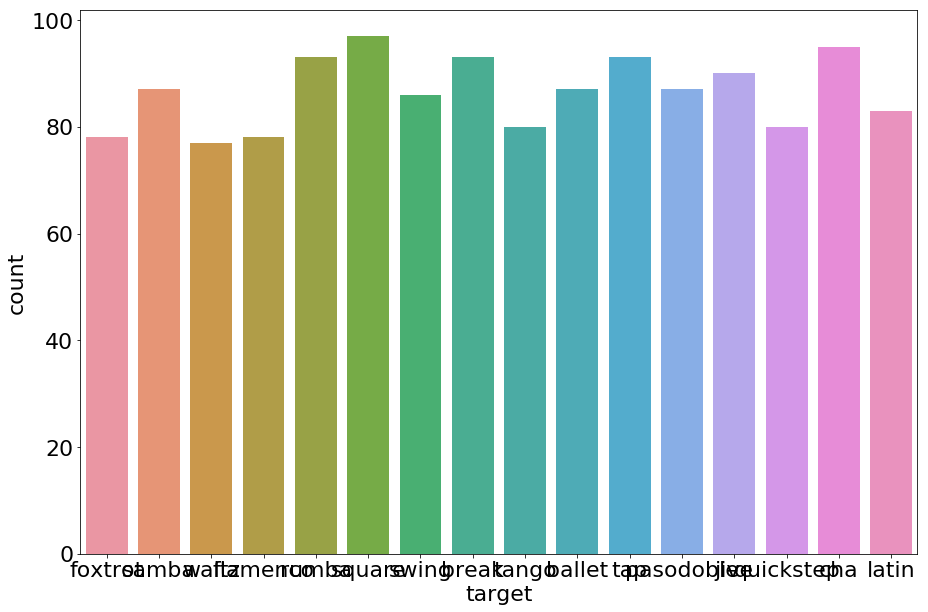

In [9]:
plt.figure(figsize=(15,10))
sns.countplot(df.target)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15


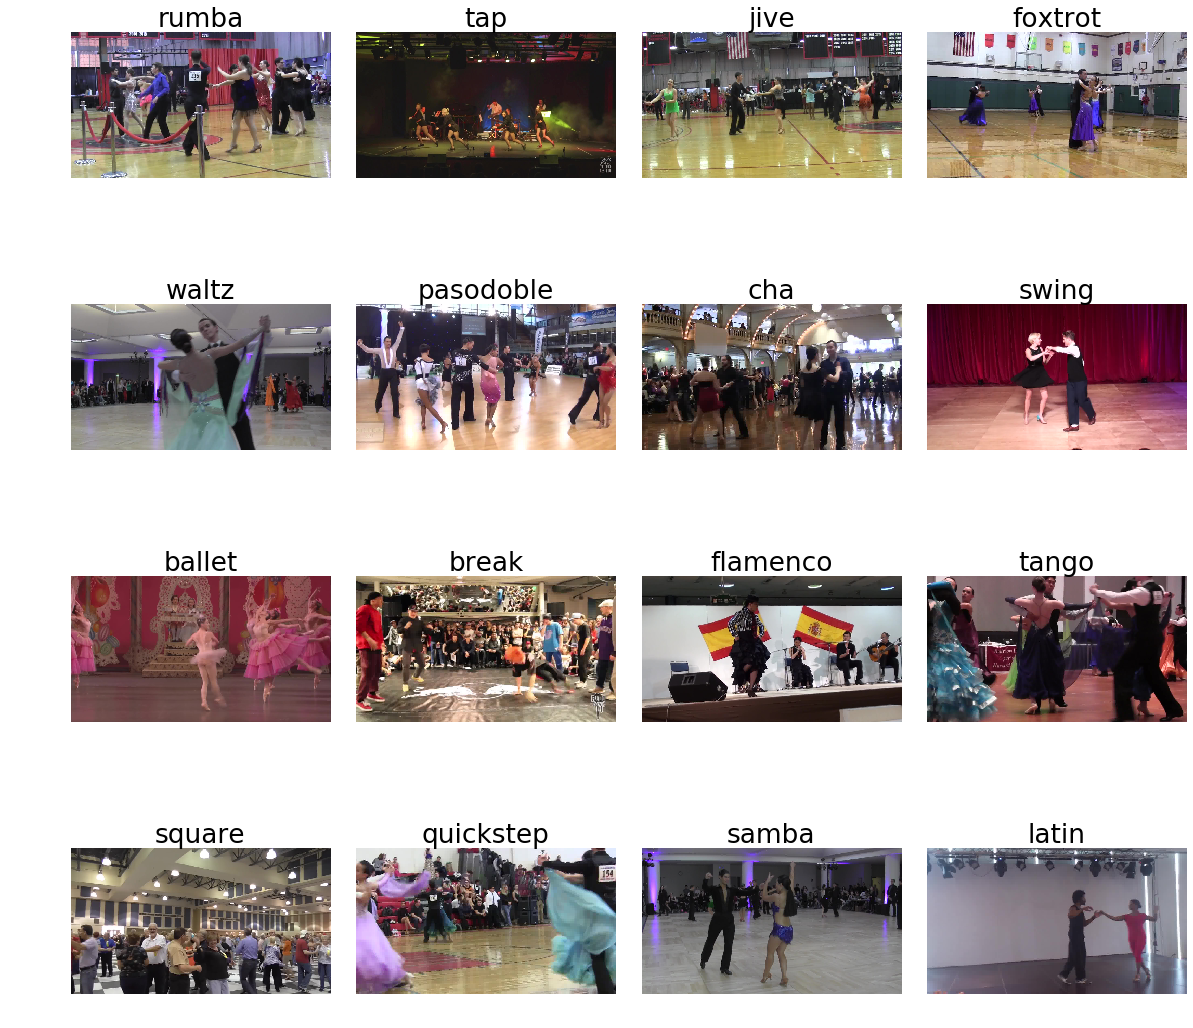

In [12]:
fig=plt.figure(figsize=(20, 20))
filenames = []
data_dir = '/mnt/cold/inputs/jersey_number_recognition/letsdance/rgb/rgb'
classes = os.listdir(data_dir)
for ids, cls in enumerate(classes):
    class_files= os.listdir(os.path.join(data_dir, cls))
    img = mpimg.imread(os.path.join(data_dir, cls, class_files[8]))
    filenames.append(class_files[8][:-3]+'png')
    print(ids)
    fig.add_subplot(4, 4, ids+1, title=cls)

    plt.imshow(img)
    plt.axis('off')
    fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.1, hspace=0)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[[[120.   0.   0.   0.]
  [120.   0.   0.   0.]
  [120.   0.   0.   0.]
  ...
  [120.   0.   0.   0.]
  [120.   0.   0.   0.]
  [120.   0.   0.   0.]]

 [[120.   0.   0.   0.]
  [120.   0.   0.   0.]
  [120.   0.   0.   0.]
  ...
  [120.   0.   0.   0.]
  [120.   0.   0.   0.]
  [120.   0.   0.   0.]]

 [[120.   0.   0.   0.]
  [120.   0.   0.   0.]
  [120.   0.   0.   0.]
  ...
  [120.   0.   0.   0.]
  [120.   0.   0.   0.]
  [120.   0.   0.   0.]]

 ...

 [[120.   0.   0.   0.]
  [120.   0.   0.   0.]
  [120.   0.   0.   0.]
  ...
  [120.   0.   0.   0.]
  [120.   0.   0.   0.]
  [120.   0.   0.   0.]]

 [[120.   0.   0.   0.]
  [120.   0.   0.   0.]
  [120.   0.   0.   0.]
  ...
  [120.   0.   0.   0.]
  [120.   0.   0.   0.]
  [120.   0.   0.   0.]]

 [[120.   0.   0.   0.]
  [120.   0.   0.   0.]
  [120.   0.   0.   0.]
  ...
  [120.   0.   0.   0.]
  [120.   0.   0.   0.]
  [120.   0.   0.   0.]]]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[[[120.   0.   0.   0.]
  [120.   0.   0.   0.]
  [120.   0.   0.   0.]
  ...
  [120.   0.   0.   0.]
  [120.   0.   0.   0.]
  [120.   0.   0.   0.]]

 [[120.   0.   0.   0.]
  [120.   0.   0.   0.]
  [120.   0.   0.   0.]
  ...
  [120.   0.   0.   0.]
  [120.   0.   0.   0.]
  [120.   0.   0.   0.]]

 [[120.   0.   0.   0.]
  [120.   0.   0.   0.]
  [120.   0.   0.   0.]
  ...
  [120.   0.   0.   0.]
  [120.   0.   0.   0.]
  [120.   0.   0.   0.]]

 ...

 [[120.   0.   0.   0.]
  [120.   0.   0.   0.]
  [120.   0.   0.   0.]
  ...
  [120.   0.   0.   0.]
  [120.   0.   0.   0.]
  [120.   0.   0.   0.]]

 [[120.   0.   0.   0.]
  [120.   0.   0.   0.]
  [120.   0.   0.   0.]
  ...
  [120.   0.   0.   0.]
  [120.   0.   0.   0.]
  [120.   0.   0.   0.]]

 [[120.   0.   0.   0.]
  [120.   0.   0.   0.]
  [120.   0.   0.   0.]
  ...
  [120.   0.   0.   0.]
  [120.   0.   0.   0.]
  [120.   0.   0.   0.]]]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[[[120.   0.   0.   0.]
  [120.   0.   0.   0.]
  [120.   0.   0.   0.]
  ...
  [120.   0.   0.   0.]
  [120.   0.   0.   0.]
  [120.   0.   0.   0.]]

 [[120.   0.   0.   0.]
  [120.   0.   0.   0.]
  [120.   0.   0.   0.]
  ...
  [120.   0.   0.   0.]
  [120.   0.   0.   0.]
  [120.   0.   0.   0.]]

 [[120.   0.   0.   0.]
  [120.   0.   0.   0.]
  [120.   0.   0.   0.]
  ...
  [120.   0.   0.   0.]
  [120.   0.   0.   0.]
  [120.   0.   0.   0.]]

 ...

 [[120.   0.   0.   0.]
  [120.   0.   0.   0.]
  [120.   0.   0.   0.]
  ...
  [120.   0.   0.   0.]
  [120.   0.   0.   0.]
  [120.   0.   0.   0.]]

 [[120.   0.   0.   0.]
  [120.   0.   0.   0.]
  [120.   0.   0.   0.]
  ...
  [120.   0.   0.   0.]
  [120.   0.   0.   0.]
  [120.   0.   0.   0.]]

 [[120.   0.   0.   0.]
  [120.   0.   0.   0.]
  [120.   0.   0.   0.]
  ...
  [120.   0.   0.   0.]
  [120.   0.   0.   0.]
  [120.   0.   0.   0.]]]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[[[120.   0.   0.   0.]
  [120.   0.   0.   0.]
  [120.   0.   0.   0.]
  ...
  [120.   0.   0.   0.]
  [120.   0.   0.   0.]
  [120.   0.   0.   0.]]

 [[120.   0.   0.   0.]
  [120.   0.   0.   0.]
  [120.   0.   0.   0.]
  ...
  [120.   0.   0.   0.]
  [120.   0.   0.   0.]
  [120.   0.   0.   0.]]

 [[120.   0.   0.   0.]
  [120.   0.   0.   0.]
  [120.   0.   0.   0.]
  ...
  [120.   0.   0.   0.]
  [120.   0.   0.   0.]
  [120.   0.   0.   0.]]

 ...

 [[120.   0.   0.   0.]
  [120.   0.   0.   0.]
  [120.   0.   0.   0.]
  ...
  [120.   0.   0.   0.]
  [120.   0.   0.   0.]
  [120.   0.   0.   0.]]

 [[120.   0.   0.   0.]
  [120.   0.   0.   0.]
  [120.   0.   0.   0.]
  ...
  [120.   0.   0.   0.]
  [120.   0.   0.   0.]
  [120.   0.   0.   0.]]

 [[120.   0.   0.   0.]
  [120.   0.   0.   0.]
  [120.   0.   0.   0.]
  ...
  [120.   0.   0.   0.]
  [120.   0.   0.   0.]
  [120.   0.   0.   0.]]]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[[[120.   0.   0.   0.]
  [120.   0.   0.   0.]
  [120.   0.   0.   0.]
  ...
  [120.   0.   0.   0.]
  [120.   0.   0.   0.]
  [120.   0.   0.   0.]]

 [[120.   0.   0.   0.]
  [120.   0.   0.   0.]
  [120.   0.   0.   0.]
  ...
  [120.   0.   0.   0.]
  [120.   0.   0.   0.]
  [120.   0.   0.   0.]]

 [[120.   0.   0.   0.]
  [120.   0.   0.   0.]
  [120.   0.   0.   0.]
  ...
  [120.   0.   0.   0.]
  [120.   0.   0.   0.]
  [120.   0.   0.   0.]]

 ...

 [[120.   0.   0.   0.]
  [120.   0.   0.   0.]
  [120.   0.   0.   0.]
  ...
  [120.   0.   0.   0.]
  [120.   0.   0.   0.]
  [120.   0.   0.   0.]]

 [[120.   0.   0.   0.]
  [120.   0.   0.   0.]
  [120.   0.   0.   0.]
  ...
  [120.   0.   0.   0.]
  [120.   0.   0.   0.]
  [120.   0.   0.   0.]]

 [[120.   0.   0.   0.]
  [120.   0.   0.   0.]
  [120.   0.   0.   0.]
  ...
  [120.   0.   0.   0.]
  [120.   0.   0.   0.]
  [120.   0.   0.   0.]]]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[[[120.   0.   0.   0.]
  [120.   0.   0.   0.]
  [120.   0.   0.   0.]
  ...
  [120.   0.   0.   0.]
  [120.   0.   0.   0.]
  [120.   0.   0.   0.]]

 [[120.   0.   0.   0.]
  [120.   0.   0.   0.]
  [120.   0.   0.   0.]
  ...
  [120.   0.   0.   0.]
  [120.   0.   0.   0.]
  [120.   0.   0.   0.]]

 [[120.   0.   0.   0.]
  [120.   0.   0.   0.]
  [120.   0.   0.   0.]
  ...
  [120.   0.   0.   0.]
  [120.   0.   0.   0.]
  [120.   0.   0.   0.]]

 ...

 [[120.   0.   0.   0.]
  [120.   0.   0.   0.]
  [120.   0.   0.   0.]
  ...
  [120.   0.   0.   0.]
  [120.   0.   0.   0.]
  [120.   0.   0.   0.]]

 [[120.   0.   0.   0.]
  [120.   0.   0.   0.]
  [120.   0.   0.   0.]
  ...
  [120.   0.   0.   0.]
  [120.   0.   0.   0.]
  [120.   0.   0.   0.]]

 [[120.   0.   0.   0.]
  [120.   0.   0.   0.]
  [120.   0.   0.   0.]
  ...
  [120.   0.   0.   0.]
  [120.   0.   0.   0.]
  [120.   0.   0.   0.]]]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[[[120.   0.   0.   0.]
  [120.   0.   0.   0.]
  [120.   0.   0.   0.]
  ...
  [120.   0.   0.   0.]
  [120.   0.   0.   0.]
  [120.   0.   0.   0.]]

 [[120.   0.   0.   0.]
  [120.   0.   0.   0.]
  [120.   0.   0.   0.]
  ...
  [120.   0.   0.   0.]
  [120.   0.   0.   0.]
  [120.   0.   0.   0.]]

 [[120.   0.   0.   0.]
  [120.   0.   0.   0.]
  [120.   0.   0.   0.]
  ...
  [120.   0.   0.   0.]
  [120.   0.   0.   0.]
  [120.   0.   0.   0.]]

 ...

 [[120.   0.   0.   0.]
  [120.   0.   0.   0.]
  [120.   0.   0.   0.]
  ...
  [120.   0.   0.   0.]
  [120.   0.   0.   0.]
  [120.   0.   0.   0.]]

 [[120.   0.   0.   0.]
  [120.   0.   0.   0.]
  [120.   0.   0.   0.]
  ...
  [120.   0.   0.   0.]
  [120.   0.   0.   0.]
  [120.   0.   0.   0.]]

 [[120.   0.   0.   0.]
  [120.   0.   0.   0.]
  [120.   0.   0.   0.]
  ...
  [120.   0.   0.   0.]
  [120.   0.   0.   0.]
  [120.   0.   0.   0.]]]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[[[120.   0.   0.   0.]
  [120.   0.   0.   0.]
  [120.   0.   0.   0.]
  ...
  [120.   0.   0.   0.]
  [120.   0.   0.   0.]
  [120.   0.   0.   0.]]

 [[120.   0.   0.   0.]
  [120.   0.   0.   0.]
  [120.   0.   0.   0.]
  ...
  [120.   0.   0.   0.]
  [120.   0.   0.   0.]
  [120.   0.   0.   0.]]

 [[120.   0.   0.   0.]
  [120.   0.   0.   0.]
  [120.   0.   0.   0.]
  ...
  [120.   0.   0.   0.]
  [120.   0.   0.   0.]
  [120.   0.   0.   0.]]

 ...

 [[120.   0.   0.   0.]
  [120.   0.   0.   0.]
  [120.   0.   0.   0.]
  ...
  [120.   0.   0.   0.]
  [120.   0.   0.   0.]
  [120.   0.   0.   0.]]

 [[120.   0.   0.   0.]
  [120.   0.   0.   0.]
  [120.   0.   0.   0.]
  ...
  [120.   0.   0.   0.]
  [120.   0.   0.   0.]
  [120.   0.   0.   0.]]

 [[120.   0.   0.   0.]
  [120.   0.   0.   0.]
  [120.   0.   0.   0.]
  ...
  [120.   0.   0.   0.]
  [120.   0.   0.   0.]
  [120.   0.   0.   0.]]]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[[[120.   0.   0.   0.]
  [120.   0.   0.   0.]
  [120.   0.   0.   0.]
  ...
  [120.   0.   0.   0.]
  [120.   0.   0.   0.]
  [120.   0.   0.   0.]]

 [[120.   0.   0.   0.]
  [120.   0.   0.   0.]
  [120.   0.   0.   0.]
  ...
  [120.   0.   0.   0.]
  [120.   0.   0.   0.]
  [120.   0.   0.   0.]]

 [[120.   0.   0.   0.]
  [120.   0.   0.   0.]
  [120.   0.   0.   0.]
  ...
  [120.   0.   0.   0.]
  [120.   0.   0.   0.]
  [120.   0.   0.   0.]]

 ...

 [[120.   0.   0.   0.]
  [120.   0.   0.   0.]
  [120.   0.   0.   0.]
  ...
  [120.   0.   0.   0.]
  [120.   0.   0.   0.]
  [120.   0.   0.   0.]]

 [[120.   0.   0.   0.]
  [120.   0.   0.   0.]
  [120.   0.   0.   0.]
  ...
  [120.   0.   0.   0.]
  [120.   0.   0.   0.]
  [120.   0.   0.   0.]]

 [[120.   0.   0.   0.]
  [120.   0.   0.   0.]
  [120.   0.   0.   0.]
  ...
  [120.   0.   0.   0.]
  [120.   0.   0.   0.]
  [120.   0.   0.   0.]]]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[[[120.   0.   0.   0.]
  [120.   0.   0.   0.]
  [120.   0.   0.   0.]
  ...
  [120.   0.   0.   0.]
  [120.   0.   0.   0.]
  [120.   0.   0.   0.]]

 [[120.   0.   0.   0.]
  [120.   0.   0.   0.]
  [120.   0.   0.   0.]
  ...
  [120.   0.   0.   0.]
  [120.   0.   0.   0.]
  [120.   0.   0.   0.]]

 [[120.   0.   0.   0.]
  [120.   0.   0.   0.]
  [120.   0.   0.   0.]
  ...
  [120.   0.   0.   0.]
  [120.   0.   0.   0.]
  [120.   0.   0.   0.]]

 ...

 [[120.   0.   0.   0.]
  [120.   0.   0.   0.]
  [120.   0.   0.   0.]
  ...
  [120.   0.   0.   0.]
  [120.   0.   0.   0.]
  [120.   0.   0.   0.]]

 [[120.   0.   0.   0.]
  [120.   0.   0.   0.]
  [120.   0.   0.   0.]
  ...
  [120.   0.   0.   0.]
  [120.   0.   0.   0.]
  [120.   0.   0.   0.]]

 [[120.   0.   0.   0.]
  [120.   0.   0.   0.]
  [120.   0.   0.   0.]
  ...
  [120.   0.   0.   0.]
  [120.   0.   0.   0.]
  [120.   0.   0.   0.]]]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[[[120.   0.   0.   0.]
  [120.   0.   0.   0.]
  [120.   0.   0.   0.]
  ...
  [120.   0.   0.   0.]
  [120.   0.   0.   0.]
  [120.   0.   0.   0.]]

 [[120.   0.   0.   0.]
  [120.   0.   0.   0.]
  [120.   0.   0.   0.]
  ...
  [120.   0.   0.   0.]
  [120.   0.   0.   0.]
  [120.   0.   0.   0.]]

 [[120.   0.   0.   0.]
  [120.   0.   0.   0.]
  [120.   0.   0.   0.]
  ...
  [120.   0.   0.   0.]
  [120.   0.   0.   0.]
  [120.   0.   0.   0.]]

 ...

 [[120.   0.   0.   0.]
  [120.   0.   0.   0.]
  [120.   0.   0.   0.]
  ...
  [120.   0.   0.   0.]
  [120.   0.   0.   0.]
  [120.   0.   0.   0.]]

 [[120.   0.   0.   0.]
  [120.   0.   0.   0.]
  [120.   0.   0.   0.]
  ...
  [120.   0.   0.   0.]
  [120.   0.   0.   0.]
  [120.   0.   0.   0.]]

 [[120.   0.   0.   0.]
  [120.   0.   0.   0.]
  [120.   0.   0.   0.]
  ...
  [120.   0.   0.   0.]
  [120.   0.   0.   0.]
  [120.   0.   0.   0.]]]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[[[120.   0.   0.   0.]
  [120.   0.   0.   0.]
  [120.   0.   0.   0.]
  ...
  [120.   0.   0.   0.]
  [120.   0.   0.   0.]
  [120.   0.   0.   0.]]

 [[120.   0.   0.   0.]
  [120.   0.   0.   0.]
  [120.   0.   0.   0.]
  ...
  [120.   0.   0.   0.]
  [120.   0.   0.   0.]
  [120.   0.   0.   0.]]

 [[120.   0.   0.   0.]
  [120.   0.   0.   0.]
  [120.   0.   0.   0.]
  ...
  [120.   0.   0.   0.]
  [120.   0.   0.   0.]
  [120.   0.   0.   0.]]

 ...

 [[120.   0.   0.   0.]
  [120.   0.   0.   0.]
  [120.   0.   0.   0.]
  ...
  [120.   0.   0.   0.]
  [120.   0.   0.   0.]
  [120.   0.   0.   0.]]

 [[120.   0.   0.   0.]
  [120.   0.   0.   0.]
  [120.   0.   0.   0.]
  ...
  [120.   0.   0.   0.]
  [120.   0.   0.   0.]
  [120.   0.   0.   0.]]

 [[120.   0.   0.   0.]
  [120.   0.   0.   0.]
  [120.   0.   0.   0.]
  ...
  [120.   0.   0.   0.]
  [120.   0.   0.   0.]
  [120.   0.   0.   0.]]]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[[[120.   0.   0.   0.]
  [120.   0.   0.   0.]
  [120.   0.   0.   0.]
  ...
  [120.   0.   0.   0.]
  [120.   0.   0.   0.]
  [120.   0.   0.   0.]]

 [[120.   0.   0.   0.]
  [120.   0.   0.   0.]
  [120.   0.   0.   0.]
  ...
  [120.   0.   0.   0.]
  [120.   0.   0.   0.]
  [120.   0.   0.   0.]]

 [[120.   0.   0.   0.]
  [120.   0.   0.   0.]
  [120.   0.   0.   0.]
  ...
  [120.   0.   0.   0.]
  [120.   0.   0.   0.]
  [120.   0.   0.   0.]]

 ...

 [[120.   0.   0.   0.]
  [120.   0.   0.   0.]
  [120.   0.   0.   0.]
  ...
  [120.   0.   0.   0.]
  [120.   0.   0.   0.]
  [120.   0.   0.   0.]]

 [[120.   0.   0.   0.]
  [120.   0.   0.   0.]
  [120.   0.   0.   0.]
  ...
  [120.   0.   0.   0.]
  [120.   0.   0.   0.]
  [120.   0.   0.   0.]]

 [[120.   0.   0.   0.]
  [120.   0.   0.   0.]
  [120.   0.   0.   0.]
  ...
  [120.   0.   0.   0.]
  [120.   0.   0.   0.]
  [120.   0.   0.   0.]]]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[[[120.   0.   0.   0.]
  [120.   0.   0.   0.]
  [120.   0.   0.   0.]
  ...
  [120.   0.   0.   0.]
  [120.   0.   0.   0.]
  [120.   0.   0.   0.]]

 [[120.   0.   0.   0.]
  [120.   0.   0.   0.]
  [120.   0.   0.   0.]
  ...
  [120.   0.   0.   0.]
  [120.   0.   0.   0.]
  [120.   0.   0.   0.]]

 [[120.   0.   0.   0.]
  [120.   0.   0.   0.]
  [120.   0.   0.   0.]
  ...
  [120.   0.   0.   0.]
  [120.   0.   0.   0.]
  [120.   0.   0.   0.]]

 ...

 [[120.   0.   0.   0.]
  [120.   0.   0.   0.]
  [120.   0.   0.   0.]
  ...
  [120.   0.   0.   0.]
  [120.   0.   0.   0.]
  [120.   0.   0.   0.]]

 [[120.   0.   0.   0.]
  [120.   0.   0.   0.]
  [120.   0.   0.   0.]
  ...
  [120.   0.   0.   0.]
  [120.   0.   0.   0.]
  [120.   0.   0.   0.]]

 [[120.   0.   0.   0.]
  [120.   0.   0.   0.]
  [120.   0.   0.   0.]
  ...
  [120.   0.   0.   0.]
  [120.   0.   0.   0.]
  [120.   0.   0.   0.]]]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[[[120.   0.   0.   0.]
  [120.   0.   0.   0.]
  [120.   0.   0.   0.]
  ...
  [120.   0.   0.   0.]
  [120.   0.   0.   0.]
  [120.   0.   0.   0.]]

 [[120.   0.   0.   0.]
  [120.   0.   0.   0.]
  [120.   0.   0.   0.]
  ...
  [120.   0.   0.   0.]
  [120.   0.   0.   0.]
  [120.   0.   0.   0.]]

 [[120.   0.   0.   0.]
  [120.   0.   0.   0.]
  [120.   0.   0.   0.]
  ...
  [120.   0.   0.   0.]
  [120.   0.   0.   0.]
  [120.   0.   0.   0.]]

 ...

 [[120.   0.   0.   0.]
  [120.   0.   0.   0.]
  [120.   0.   0.   0.]
  ...
  [120.   0.   0.   0.]
  [120.   0.   0.   0.]
  [120.   0.   0.   0.]]

 [[120.   0.   0.   0.]
  [120.   0.   0.   0.]
  [120.   0.   0.   0.]
  ...
  [120.   0.   0.   0.]
  [120.   0.   0.   0.]
  [120.   0.   0.   0.]]

 [[120.   0.   0.   0.]
  [120.   0.   0.   0.]
  [120.   0.   0.   0.]
  ...
  [120.   0.   0.   0.]
  [120.   0.   0.   0.]
  [120.   0.   0.   0.]]]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[[[120.   0.   0.   0.]
  [120.   0.   0.   0.]
  [120.   0.   0.   0.]
  ...
  [120.   0.   0.   0.]
  [120.   0.   0.   0.]
  [120.   0.   0.   0.]]

 [[120.   0.   0.   0.]
  [120.   0.   0.   0.]
  [120.   0.   0.   0.]
  ...
  [120.   0.   0.   0.]
  [120.   0.   0.   0.]
  [120.   0.   0.   0.]]

 [[120.   0.   0.   0.]
  [120.   0.   0.   0.]
  [120.   0.   0.   0.]
  ...
  [120.   0.   0.   0.]
  [120.   0.   0.   0.]
  [120.   0.   0.   0.]]

 ...

 [[120.   0.   0.   0.]
  [120.   0.   0.   0.]
  [120.   0.   0.   0.]
  ...
  [120.   0.   0.   0.]
  [120.   0.   0.   0.]
  [120.   0.   0.   0.]]

 [[120.   0.   0.   0.]
  [120.   0.   0.   0.]
  [120.   0.   0.   0.]
  ...
  [120.   0.   0.   0.]
  [120.   0.   0.   0.]
  [120.   0.   0.   0.]]

 [[120.   0.   0.   0.]
  [120.   0.   0.   0.]
  [120.   0.   0.   0.]
  ...
  [120.   0.   0.   0.]
  [120.   0.   0.   0.]
  [120.   0.   0.   0.]]]


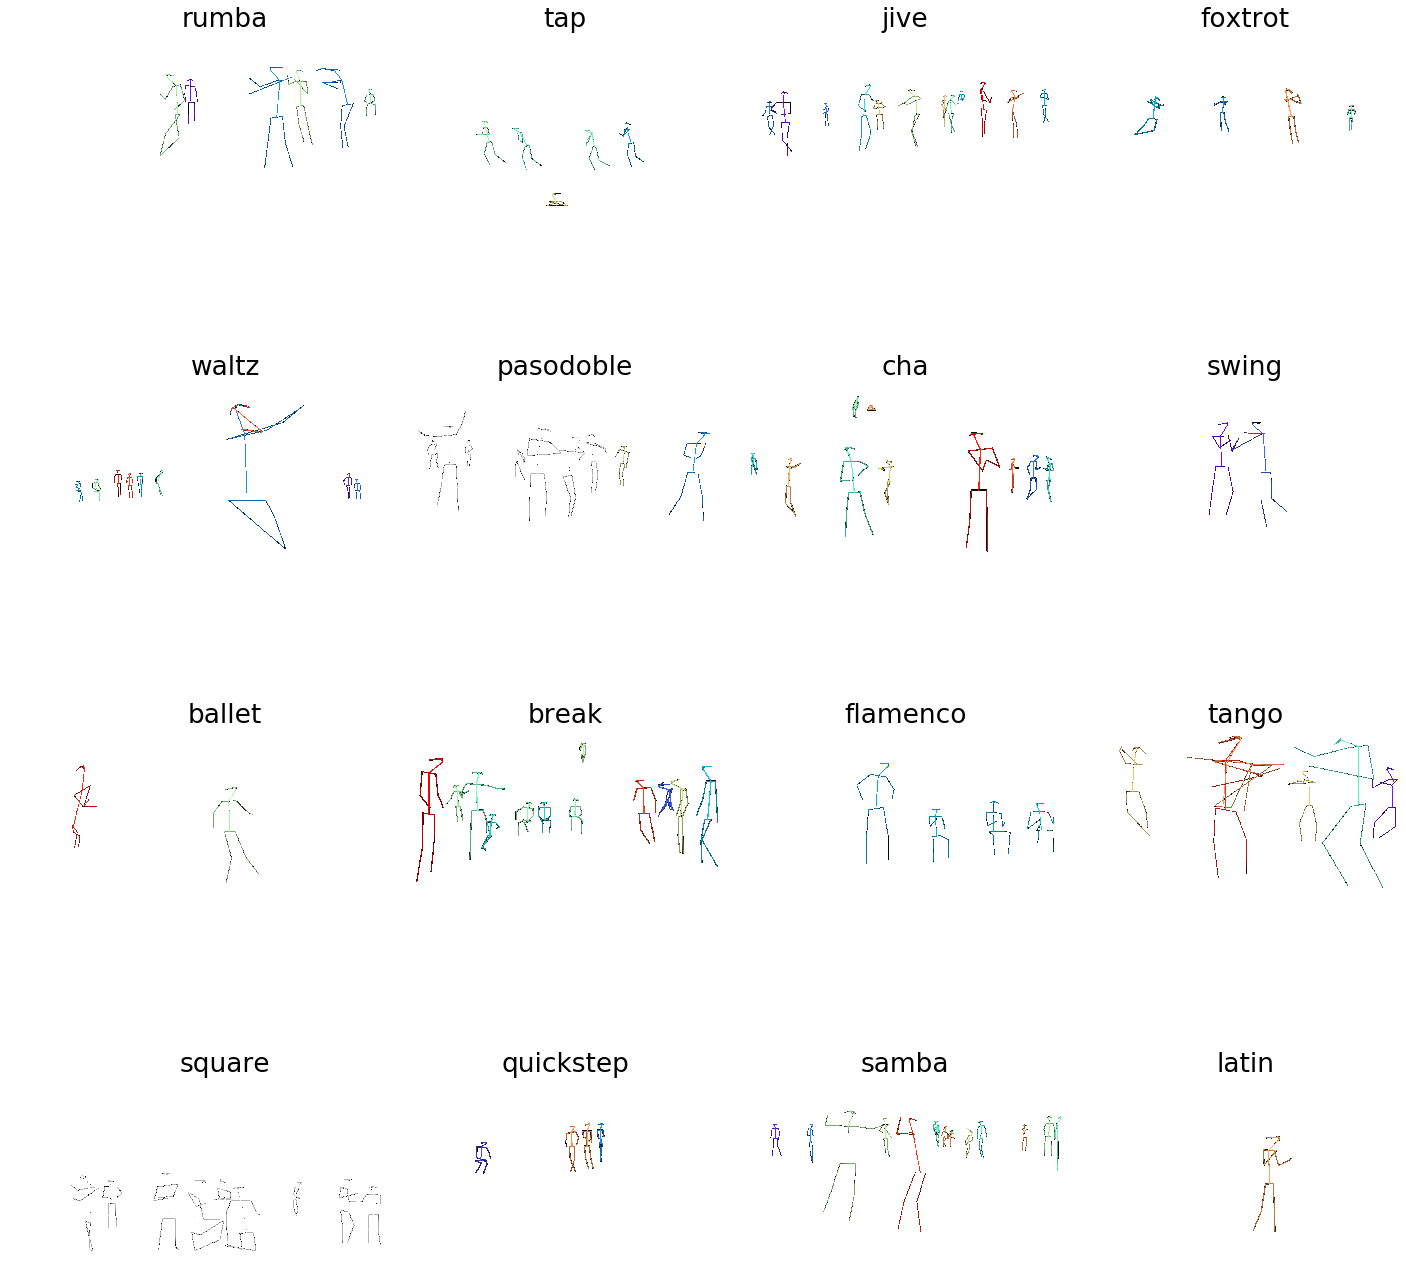

In [48]:
fig=plt.figure(figsize=(20, 20))
data_dir = '/mnt/cold/inputs/jersey_number_recognition/letsdance/densepose/rgb'

for ids, cls in enumerate(classes):
    class_files= os.listdir(os.path.join(data_dir, cls))
    img = mpimg.imread(os.path.join(data_dir, cls, filenames[ids]))
    mask = (img == [0.,0.,0., 1.]).all(axis=2)
    img[ mask ] = [120,0,0, 0]
    fig.add_subplot(4, 4, ids+1, title=cls)
    print(img)

    plt.imshow(np.array(img*255, dtype='int'))
    plt.axis('off')
    plt.tight_layout()
    fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.1, hspace=0)

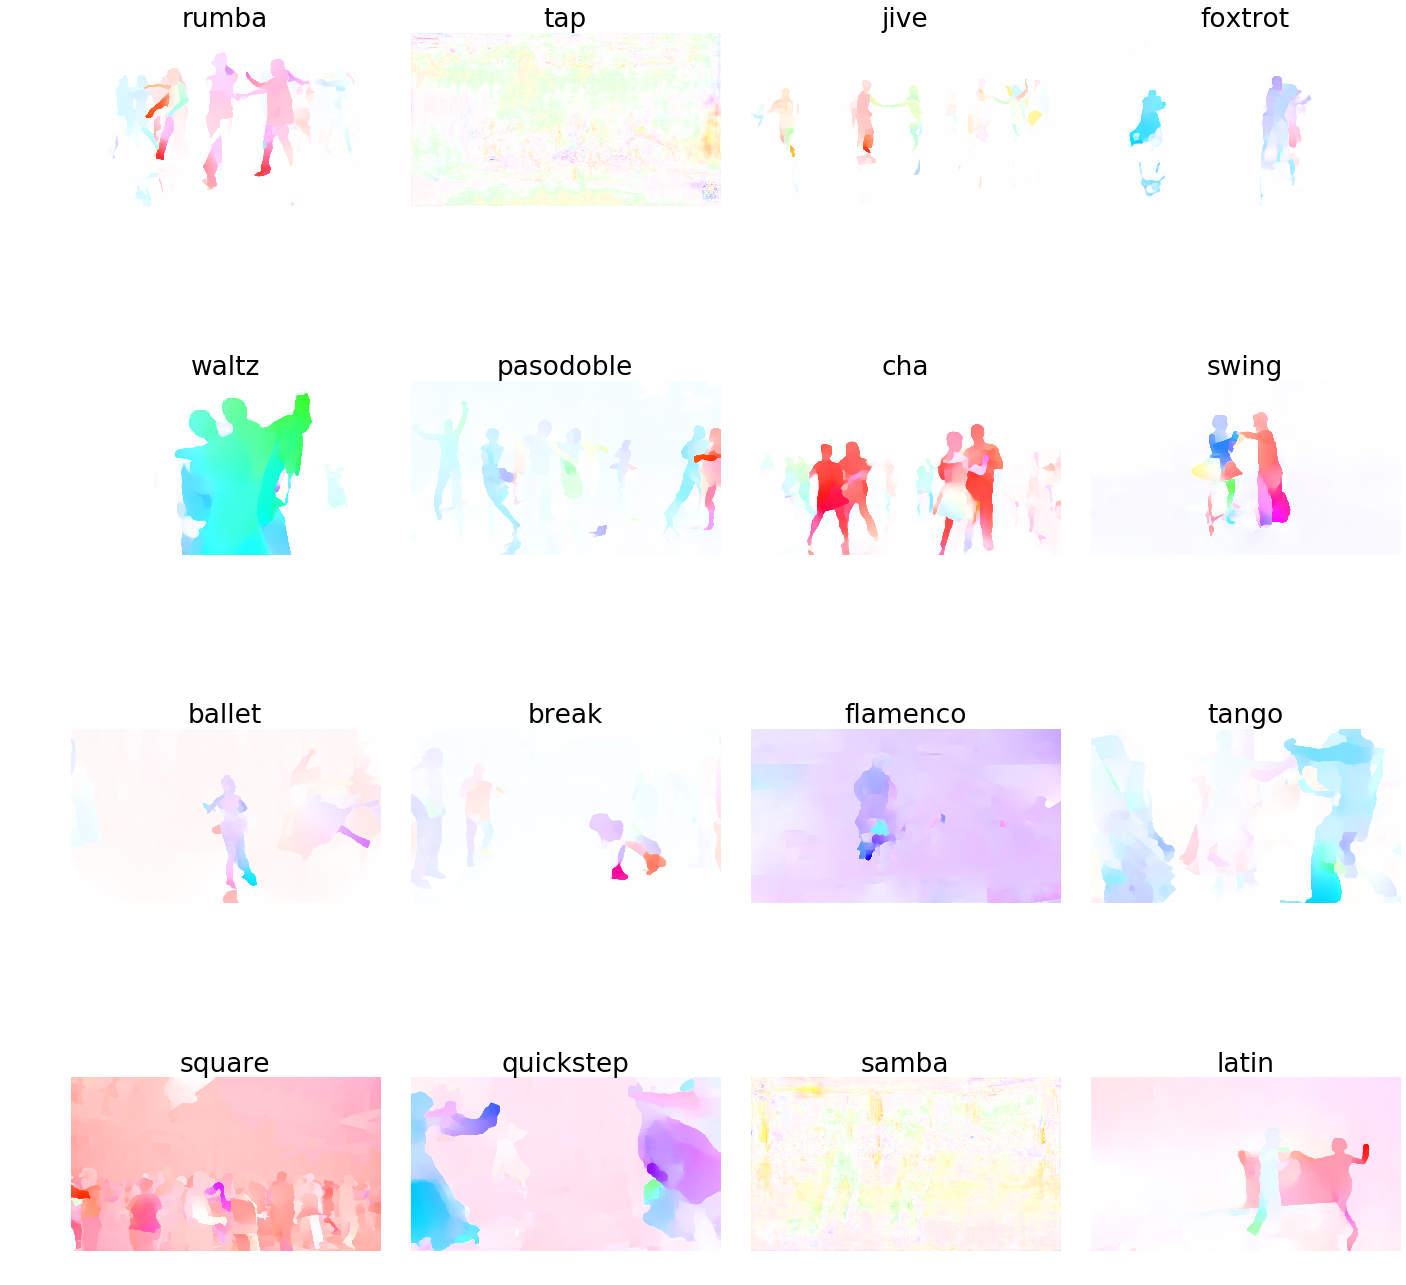

In [13]:
data_dir = '/mnt/cold/inputs/jersey_number_recognition/letsdance/flow_png/'
fig=plt.figure(figsize=(20, 20))

for ids, cls in enumerate(classes):
    class_files= os.listdir(os.path.join(data_dir, cls))
    img = mpimg.imread(os.path.join(data_dir, cls, filenames[ids]))
    fig.add_subplot(4, 4, ids+1, title=cls)

    plt.imshow(img)
    plt.axis('off')
    plt.tight_layout()
    fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.1, hspace=0)

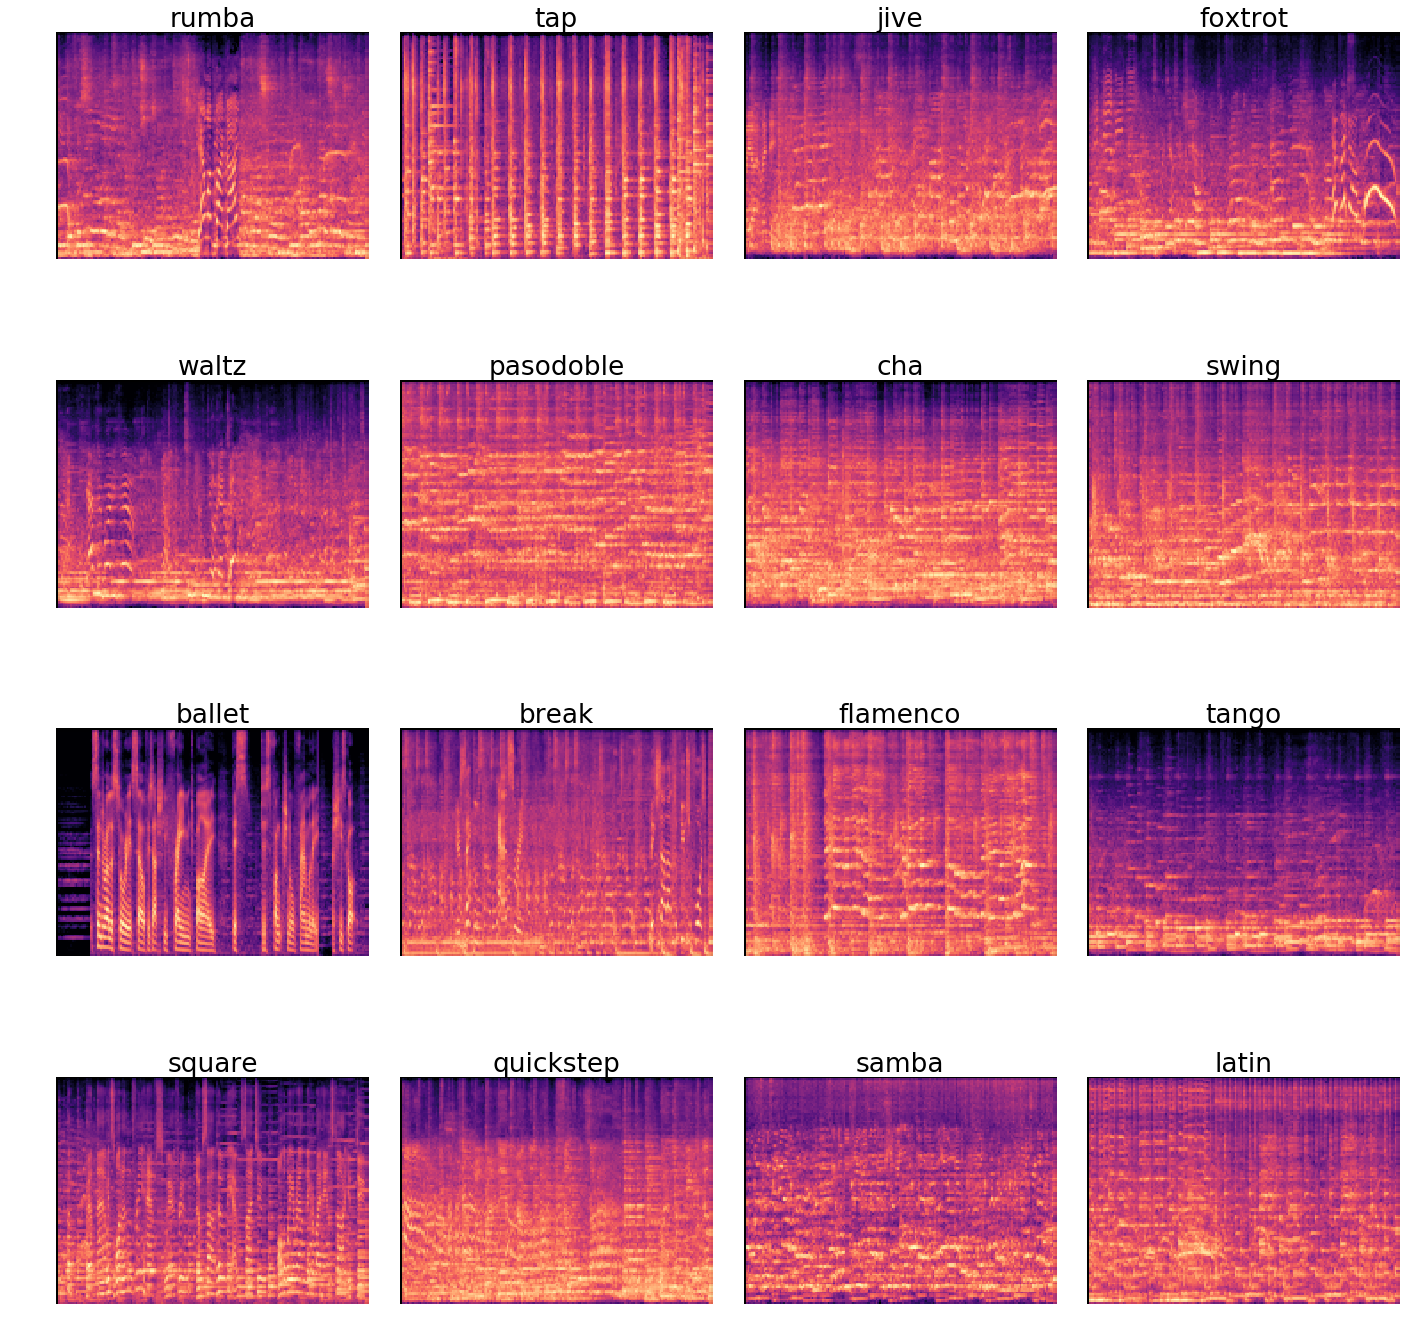

In [11]:
data_dir = '/mnt/cold/inputs/jersey_number_recognition/letsdance/audio_mfcc/'
fig=plt.figure(figsize=(20, 20))

for ids, cls in enumerate(classes):
    class_files= os.listdir(os.path.join(data_dir, cls))
    img = mpimg.imread(os.path.join(data_dir, cls, class_files[0]))
    fig.add_subplot(4, 4, ids+1, title=cls)

    plt.imshow(img)
    plt.axis('off')
    plt.tight_layout()
    fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.1, hspace=0)

In [13]:
img.shape

(128, 176, 4)